In [1]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from rotation_random_forest import RotationForest

RANDOM_STATE = 73

In [2]:
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2,
    n_informative=4, n_redundant=3, n_repeated=2,
    random_state=RANDOM_STATE)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [7]:
rf = RandomForestClassifier().fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       102
           1       0.82      0.76      0.79        98

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [6]:
rrf = RotationForest(k_features_subsets=10).fit(X_train, y_train)
print(classification_report(y_test, rrf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       102
           1       0.87      0.81      0.84        98

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



### Visualize

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')
sns.set_palette('Dark2')

cm_piyg = plt.cm.PiYG
cm_bright = ListedColormap(["#b30065", "#178000"])

def separating_surface(X, y, model, h=0.2):
    if X.shape[1] != 2:
        raise ValueError("X must has dim == (N, 2)")
    X1_min, X1_max = X[:, 0].min()-1, X[:, 0].max()+1
    X2_min, X2_max = X[:, 1].min()-1, X[:, 1].max()+1   
    X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, h), np.arange(X2_min, X2_max, h))
    
    # flatten each grid to a vector
    X1_flatten, X2_flatten = X1.flatten(), X2.flatten()
    X1_reshaped, X2_reshaped = X1_flatten.reshape((len(X1_flatten), 1)), X2_flatten.reshape((len(X2_flatten), 1))
    grid = np.hstack((X1_reshaped,X2_reshaped))
    
    # split and trainint
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=73)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    Z = model.predict_proba(grid)[:,1]
    Z = Z.reshape(X1.shape)
    
    c = plt.contourf(X1, X2, Z, cmap=cm_piyg, alpha=0.8)
    plt.colorbar(c)
    
    # plot the training points
    plt.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="w"
    )
    # and testing points
    plt.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cm_bright,
        edgecolors="w",
        alpha=0.6,
    )
    ax = plt.gca()
    ax.text(
            0.95, 0.06,
            (f"{score:.2f}").lstrip("0"),
            size=15,
            bbox=dict(boxstyle="round", alpha=0.8, facecolor="white"),
            horizontalalignment="right",
            transform=ax.transAxes
        )
    
    plt.tight_layout()
    ax.text(
        0.5, 1.05,
        model.__class__.__name__,
        horizontalalignment="center",
        size="x-large",
        transform=ax.transAxes
    )
    
    plt.legend([],[], frameon=False)

### Plot

In [12]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=0)

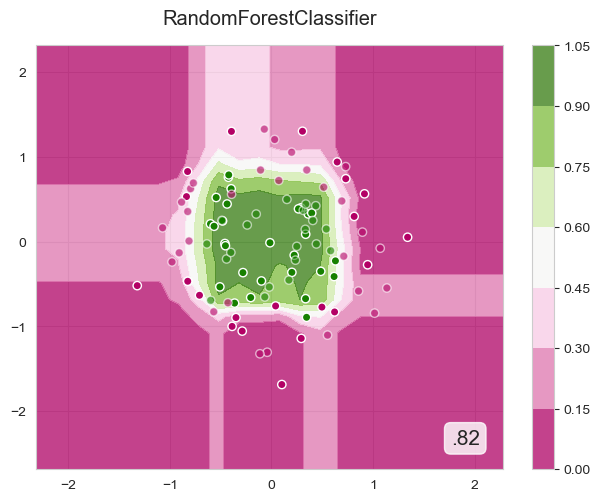

In [22]:
separating_surface(X, y, RandomForestClassifier())

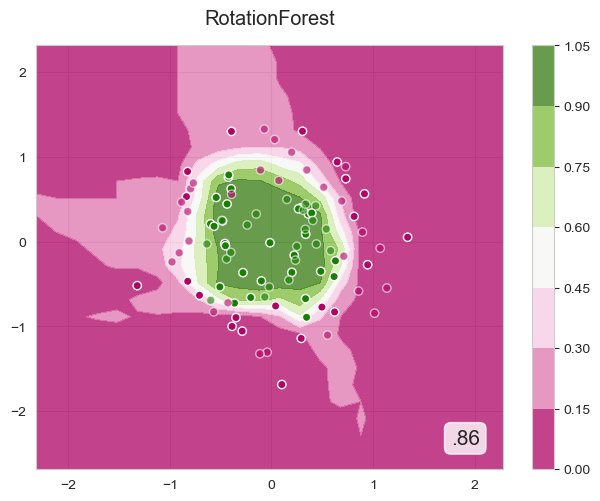

In [18]:
separating_surface(X, y, RotationForest(k_features_subsets=1))